# Exercise 7:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework datasets/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [32]:
# If you are running this on your local computer, wet your workign directory to 
# the location of the lexDat data by setting your harddrive. Uncomment this line
# and change the location to where it is on your computer. 
setwd("/Users/ddbutler/Desktop/repos_new/Butler_DSPN_S24/Homework")

# If you are running this on Colab, then use something like this.
# system("gdown --id 1hywRmGdvhbDYTrQRyl1_bLJsq-T3GJq2")

# INSERT CODE HERE
library(tidyverse)
library(dplyr)

d1 <- read.csv('hcp_data/unrestricted_trimmed_1_7_2020_10_50_44.csv') %>%
    select(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
    drop_na()

head(d1)


,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
1,100206,M,130.42,543134,807245
2,100307,F,112.56,407292,664124
3,100408,M,121.18,500417,726206
4,100610,M,126.53,512946,762308
5,101006,F,101.85,429449,579632
6,101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


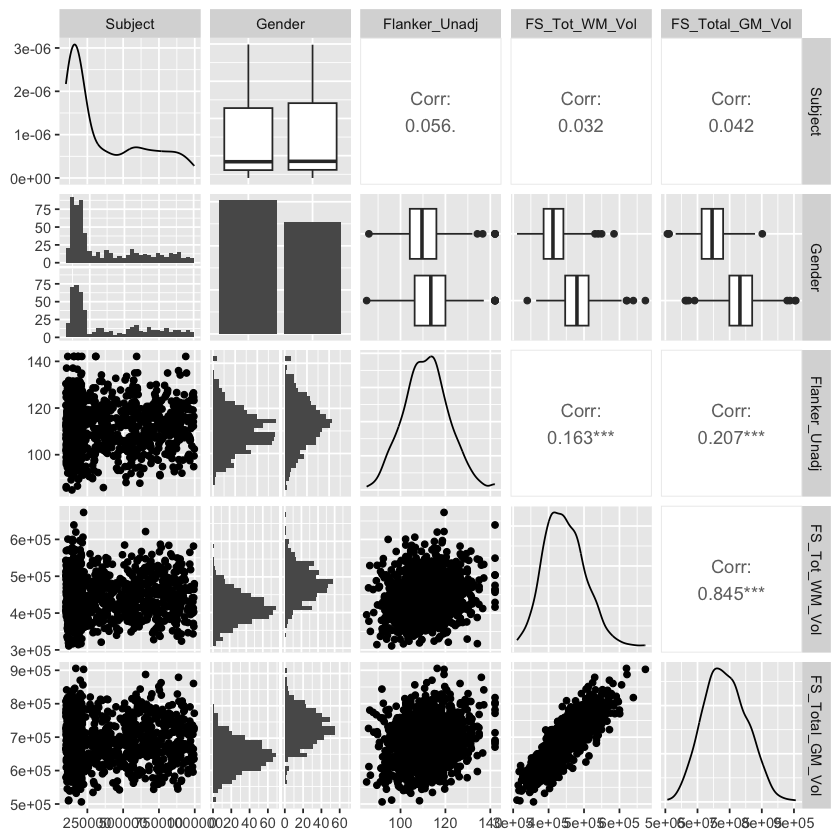

In [33]:
#INSERT CODE HERE
#suppress warnings for this notebook
options(warn=-1)
#to turn warnings back on
#options(warn=0)

#load packages
library(ggplot2)
suppressMessages( #suppress messages for this piece of code
    library(GGally))

d1 %>% ggpairs()

> *Write your response here.* 

> Subject has no correlation to anything. Flanker_Unadj has some weak positive correlation with FS_Tot_WM_Vol and FS_Total_GM_Vol. FS_Tot_WM_Vol and FS_Total_GM_Vol have strong positive correlation. 

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [34]:
#INSERT CODE HERE
lin_model = lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1) 
summary(lin_model)
confint(lin_model)


Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


> *Write your response here.* 
> 
 The estimate for $beta_0$ is 9.026e+01 with a confidence interval of 8.428917e+01 to	9.622375e+01. 

 The estimate for $\beta_1$ is 3.110e-05 with a confidence interval of 2.244198e-05	3.975733e-05. 

 Yes. Grey matter volume is significantly associated with Flanker Task performance witha p value of 3.18e-12. 

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see. 

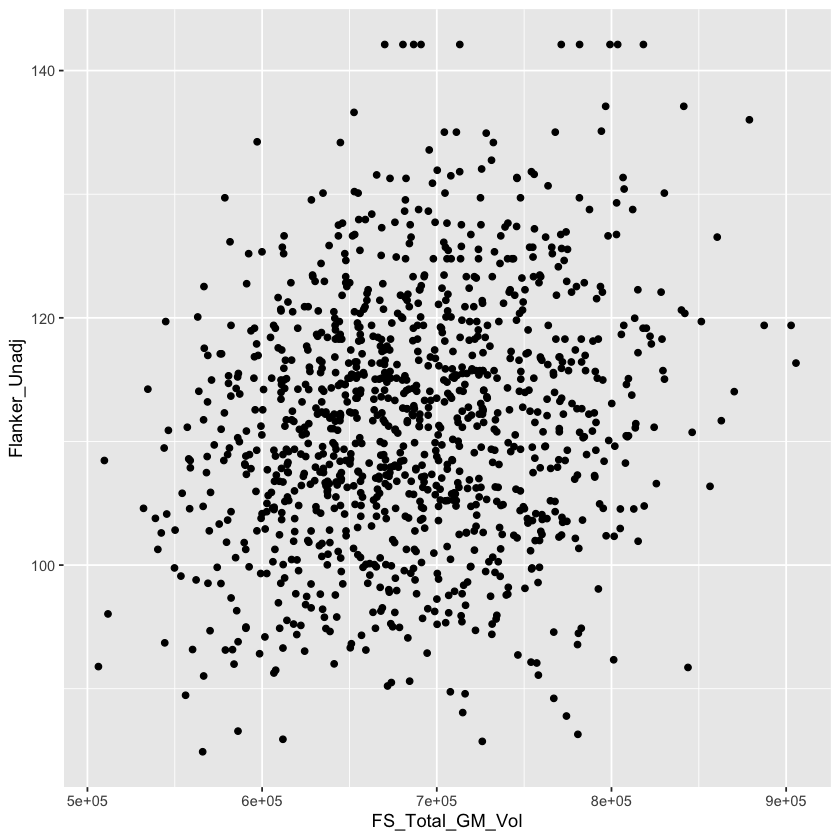

In [35]:
#INSERT CODE HERE
library(ggplot2)

d1 %>% ggplot(aes(x = FS_Total_GM_Vol, y = Flanker_Unadj)) +
  geom_point() 

> *Write your response here.* 
> I see a weak upward trend suggesting a weak positive correlation. 

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> *Write your response here.* 
> I would copclude that for every 1 unit increase in grey matter volume there is a 3.110e-05 increase in Flasker test performance. These two variables are positively associated. 

**DUE:** 5pm EST, February 26, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*